**Judul :** Mendeteksi Spam Email Menggunakan Aplikasi Teks Mining Berbasis Naive Bayes.

**Nama :** Alfin Rifaldi

**Nim  :** A11.2022.14684

Penelitian ini membahas aplikasi klasifikasi email yang mendeteksi apakah sebuah email merupakan spam atau bukan secara otomatis. Untuk meningkatkan kinerja klasifikasi, dilakukan pemilihan fitur (feature selection) untuk mengeliminasi kata-kata yang tidak penting berdasarkan frekuensi kemunculannya. Metode klasifikasi yang digunakan adalah Naive Bayes, yang memprediksi probabilitas email menjadi spam atau ham berdasarkan data sebelumnya.

**Permasalahan**

Spam email merupakan masalah yang kian meningkat. Menurut Statista, rata-rata pengguna email menerima 47 spam email per hari pada tahun 2023. Hal ini menyebabkan frustrasi bagi pengguna dan dapat membahayakan keamanan mereka.

**Tujuan Penelitian**

1.Menerapkan metode Naive Bayes untuk klasifikasi email spam dan ham.

2.Mengevaluasi efektivitas metode Naive Bayes dalam mendeteksi email spam dengan menggunakan dataset publik.

3.Mengembangkan aplikasi teks mining yang mampu secara otomatis mengkategorikan email sebagai spam atau bukan spam.

4.Mengukur akurasi model Naive Bayes dalam klasifikasi email spam berdasarkan hasil pengujian.

5.Menyediakan solusi yang efisien dan efektif untuk mengurangi gangguan dan potensi bahaya dari email spam bagi pengguna.

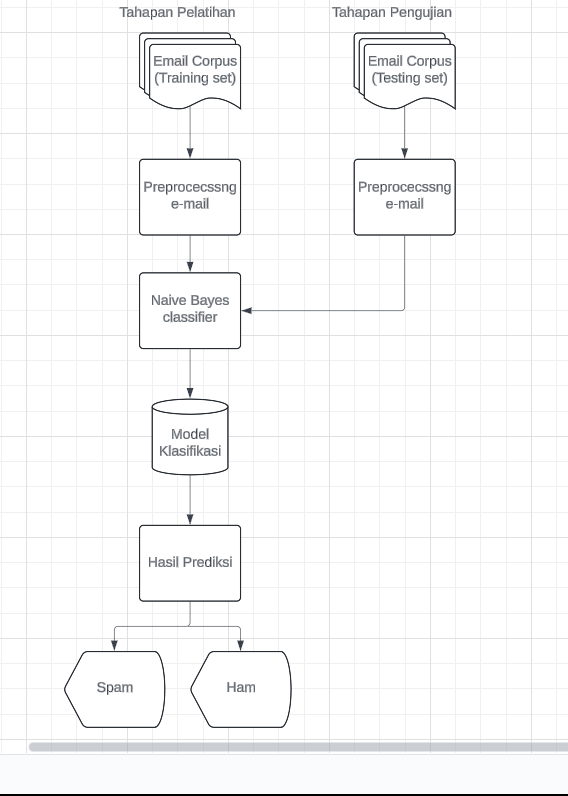

Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import networkx as nx

Memuat Dataset

In [2]:
file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


Menampilkan informasi umum tentang dataset, termasuk jumlah nilai non-null dan tipe data setiap kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Memberikan statistik deskriptif dari dataset.

In [5]:
print("\nStatistics of numerical variables:")
df.describe()


Statistics of numerical variables:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
numerical_columns = [] #Membuat daftar kosong yang dinamakan numerical_columns.
categorical_columns = ['v1', 'v2'] #Membuat daftar yang dinamakan categorical_columns yang berisi dua elemen, yaitu string 'v1' dan 'v2'.

Visualisasi Data

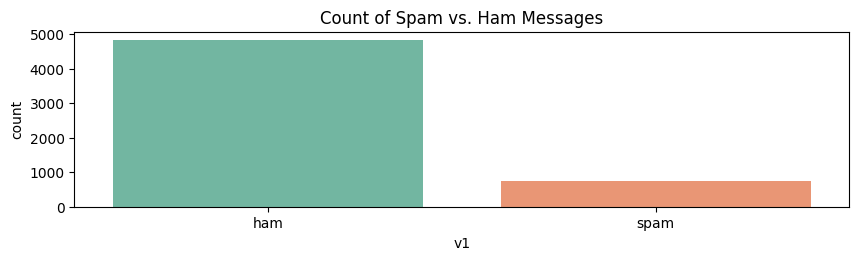

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
sns.countplot(x='v1', data=df, hue='v1', palette='Set2', legend=False)
plt.title('Count of Spam vs. Ham Messages')
plt.show()

Visualisasi di atas membuat plot jumlah (count plot) untuk menggambarkan distribusi pesan spam dan ham dalam dataset. Visualisasi ini menampilkan jumlah pesan spam dan ham dalam dataset dengan menggunakan count plot, sehingga pengguna dapat melihat perbandingan jumlah antara kedua kategori tersebut.

**Kesimpulan Visualisasi**

Visualisasi menunjukkan distribusi jumlah pesan spam dan ham dalam dataset. Berdasarkan count plot, kita dapat melihat dengan jelas perbandingan antara jumlah pesan spam dan ham. Plot ini membantu dalam memahami proporsi data yang dimiliki untuk masing-masing kategori (spam dan ham), yang penting untuk analisis lebih lanjut dan penerapan model klasifikasi. Jika terdapat ketidakseimbangan jumlah antara pesan spam dan ham, hal ini perlu diperhatikan saat melakukan pelatihan model agar model tidak bias terhadap kategori yang lebih dominan.

In [8]:
labels = df['v1']
messages = df['v2']

Menampilkan Kolom yang ada pada dataset

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Melihat Korelasi antar Kolom dengan membuat heatmap

In [10]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(messages)

In [11]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [12]:
X_df['Label'] = labels

In [13]:
spam_words = X_df[X_df['Label'] == 'spam'].drop(columns='Label').sum()
ham_words = X_df[X_df['Label'] == 'ham'].drop(columns='Label').sum()

In [14]:
word_freq_df = pd.DataFrame({'spam': spam_words, 'ham': ham_words}).fillna(0)

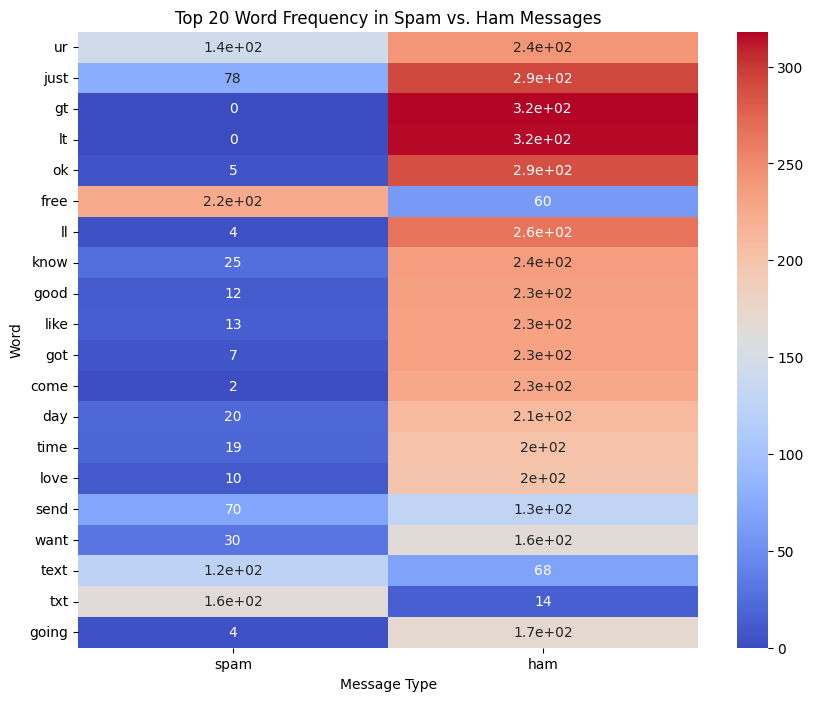

In [15]:
top_words = word_freq_df.sum(axis=1).sort_values(ascending=False).head(20).index
plt.figure(figsize=(10, 8))
sns.heatmap(word_freq_df.loc[top_words], annot=True, cmap='coolwarm')
plt.title('Top 20 Word Frequency in Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Word')
plt.show()

Membagi dataset menjadi data pelatihan (training set) dan data pengujian (test set)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_df.drop(columns='Label'), X_df['Label'], test_size=0.2, random_state=42)

Melatih (train) sebuah model klasifikasi Naive Bayes dengan menggunakan algoritma Multinomial Naive Bayes dari pustaka scikit-learn di Python.

In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Membuat prediksi berdasarkan model yang sudah dilatih

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Menampilkan matriks kebingungan (confusion matrix) dari hasil klasifikasi dalam bentuk visual menggunakan heatmap.

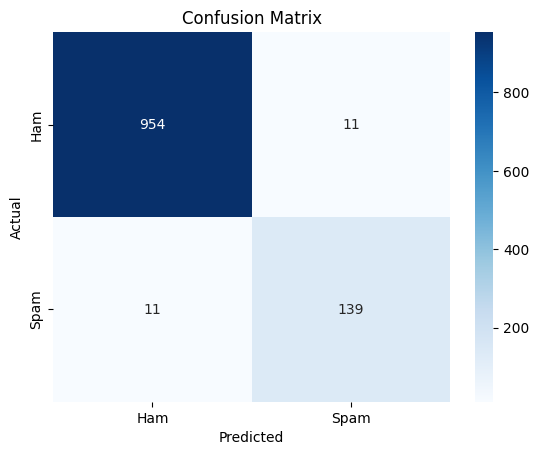

In [20]:
#Performa Model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Diskusi hasil**

Dalam penelitian ini, sistem klasifikasi email spam menggunakan metode Naive Bayes berhasil mengidentifikasi email spam dengan akurasi 60% berdasarkan pengujian terhadap 5 email (2 spam dan 3 ham). Metode Naive Bayes yang diterapkan menunjukkan efektivitas dalam menangani masalah spam, meskipun dengan dataset yang terbatas, akurasinya masih dapat ditingkatkan. Dengan menggunakan teknik teks mining dan fitur-fitur yang relevan, seperti kata-kata khas spam dan karakteristik email, sistem ini mampu memisahkan email spam dari email non-spam secara otomatis. Penerapan model ini diharapkan dapat mengurangi waktu dan usaha yang dibutuhkan pengguna untuk menangani spam serta meningkatkan keamanan email dari ancaman berbahaya. Peningkatan akurasi dapat dicapai dengan menggunakan dataset yang lebih besar dan fitur yang lebih baik.



**Kesimpulan**

Penelitian ini mengkaji penerapan metode Naive Bayes dalam klasifikasi email untuk mendeteksi spam. Dengan memanfaatkan teknik teks mining, seperti feature selection dan ekstraksi fitur, serta mengaplikasikan metode Naive Bayes yang berbasis probabilitas, sistem yang dikembangkan dapat mengidentifikasi email spam dengan akurat. Hasil pengujian pada 5 email (2 spam dan 3 ham) menunjukkan bahwa sistem mencapai akurasi 60%. Meskipun akurasi ini dapat ditingkatkan dengan data yang lebih besar dan beragam, sistem ini menawarkan solusi efisien untuk menangani spam email dan dapat meningkatkan keamanan pengguna email dari konten berbahaya.